In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
import datetime
import calendar
import seaborn as sns
import sys

In [2]:
df = pd.read_csv('091120.csv')
pd.set_option('display.max_rows', None)

In [3]:
# Sets Form Date to datetime format
df['Form Date']= pd.to_datetime(df['Form Date'])
df['Form Date']= df['Form Date'].dt.date

# Resetting index, creating count series for each day
df.reset_index(inplace=True)
count = df.groupby(['Form Date']).size().sort_values(ascending=False)
df['Form Date'].dtype

dtype('O')

In [4]:
# Casting Count series from above to DataFrame
df = pd.DataFrame(data = count)
df.reset_index(inplace=True)
df = df.rename(columns = {"Form Date": "date", 0: "count"})
# df = df.sort_values(by="date")

# df.head()

In [5]:
# resetting df to datetime format
df['date'] = pd.to_datetime(df['date'])
print('datatype is ' + str(df['date'].dtype))
df.head()

datatype is datetime64[ns]


,date,count
0,2020-06-23,107
1,2020-05-20,107
2,2020-06-10,104
3,2020-06-29,98
4,2020-06-30,97


In [107]:
# creating new dataframe of the full range of dates from df.min to df.max
idx = pd.date_range(df['date'].min(), df['date'].max())
s = pd.DataFrame(data = idx)
s['count'] = 0
s = s.rename(columns = {0:'date', 'count':'count'})


print('datatype is ' + str(s.date.dtype))
s.head()

datatype is datetime64[ns]


,date,count
0,2020-02-18,0
1,2020-02-19,0
2,2020-02-20,0
3,2020-02-21,0
4,2020-02-22,0


In [108]:
if isinstance(df, pd.DataFrame):
    print('df is a dataframe')
else:
    print('df is not a dataframe')
if isinstance(s, pd.DataFrame):
    print('s is a dataframe')
else:
    print('s is not a dataframe')

df['date'].dtype
s['date'].dtype
    

df is a dataframe
s is a dataframe


dtype('<M8[ns]')

In [123]:
left = s
right = df

df = left.merge(right, on='date', how='left')
df = df.drop('count_x', 1)
df = df.rename(columns = {'date':'date', 'count_y':'count'})
df.fillna(0, inplace=True)
df.head()

,date,count
0,2020-02-18,2.0
1,2020-02-19,4.0
2,2020-02-20,8.0
3,2020-02-21,4.0
4,2020-02-22,0.0


/Users/arlisscoates/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


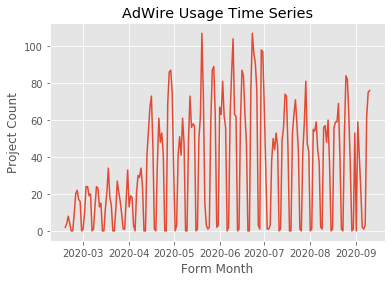

In [114]:
y = df['date']
x = df['count']

plt.plot(y,x)
plt.title("AdWire Usage Time Series")
plt.xlabel("Form Month")
plt.ylabel("Project Count")
plt.show()

In [129]:
weekno = datetime.datetime.today().weekday()

if weekno<5:
    print "Weekday"
else:
    print "Weekend"

AttributeError: 'Int64Index' object has no attribute 'dayofweek'

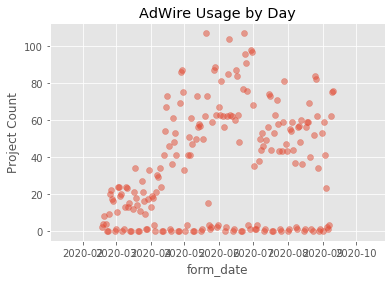

In [128]:
plt.scatter(y, x, alpha=0.5)
plt.title('AdWire Usage by Day')
plt.xlabel('form_date')
plt.ylabel('Project Count')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

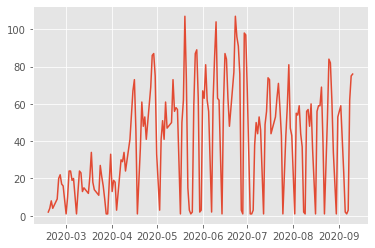

In [77]:
x = df['form_date']
y = df['count']

plt.plot(x,y)
plt.show

In [50]:
# Bin data by week and month for time series
# Correlation table by weekday
# Remove weekends to smooth curve
# Identify weirdos
# Google studio - Market X Time Series X Projects Count X vs. Deals

In [271]:
df.describe()

,count
count,175.000000
mean,40.800000
std,29.009313
min,1.000000
25%,14.500000
50%,43.000000
75%,62.000000
max,107.000000
